In [1]:
import os
os.environ["PROJECT_DIR"]="/Max/Proga/GRISHIN_ML/CV_HW2/FaceRec"
os.environ["N_ANCHOR_CLASSES"] = "32"
os.environ["MODEL_NAME"] = "effb0_emb600_twinsampler"

In [2]:
from src.pipeline.save_load_model import load_model
from src.models.inference_model import FaceRecModel
from src.data.preprocessing import (
    augmentation_transforms,
    post_transform,
    pre_transform
)

import cv2
import torch
import numpy as np
import torchvision
import albumentations as albu
import matplotlib.pyplot as plt

In [3]:
MY_IMAGES_DATA_PATH = os.environ["PROJECT_DIR"] + "/data/raw/my_images/"

IMAGES_TO_COMPARE_PATH = os.environ["PROJECT_DIR"] + "/data/raw/validation/"

MODEL_NAME = os.environ["MODEL_NAME"]

In [4]:
my_faces = None
for image_name in os.listdir(MY_IMAGES_DATA_PATH):
    img = cv2.imread(MY_IMAGES_DATA_PATH + image_name)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (256, 256))
    img = torch.tensor(img).permute(2, 0, 1)
    if my_faces is None: 
        my_faces = img[None, ...]
    else:
        my_faces = torch.cat(
            (my_faces, img[None, ...]),
            dim = 0
        )
        
validation_faces = None
for image_name in os.listdir(IMAGES_TO_COMPARE_PATH):
    img = cv2.imread(IMAGES_TO_COMPARE_PATH + image_name)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (256, 256))
    img = torch.tensor(img).permute(2, 0, 1)
    if validation_faces is None: 
        validation_faces = img[None, ...]
    else:
        validation_faces = torch.cat(
            (validation_faces, img[None, ...]),
            dim = 0
        )

## Будет распозновать по этому лицу

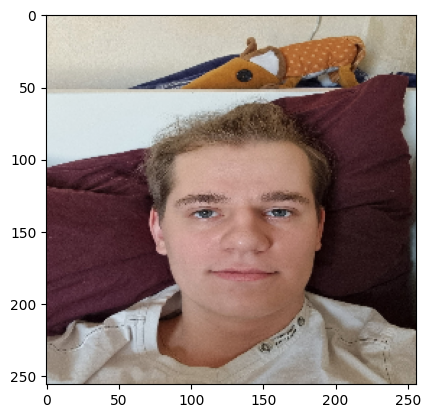

In [5]:
image_to_learn = my_faces[1].permute(1, 2, 0).numpy()
plt.imshow(image_to_learn)

## Изображения, где я есть

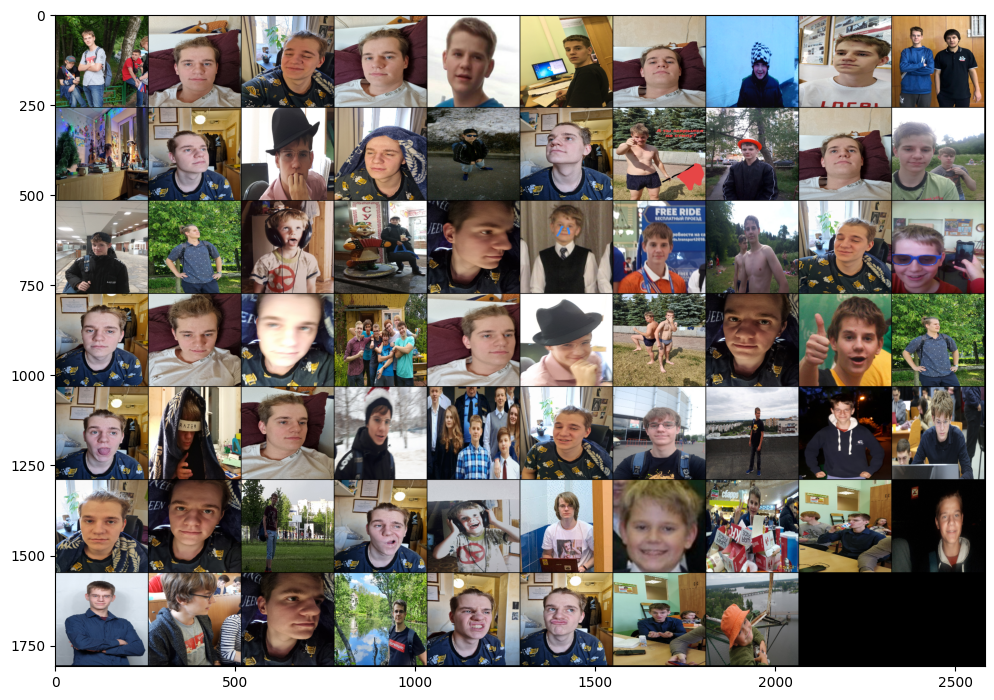

In [6]:
grid = torchvision.utils.make_grid(my_faces, nrow=10)
plt.figure(figsize=(12, 16))
plt.imshow(grid.permute(1, 2, 0))

## Изображения, где меня нет

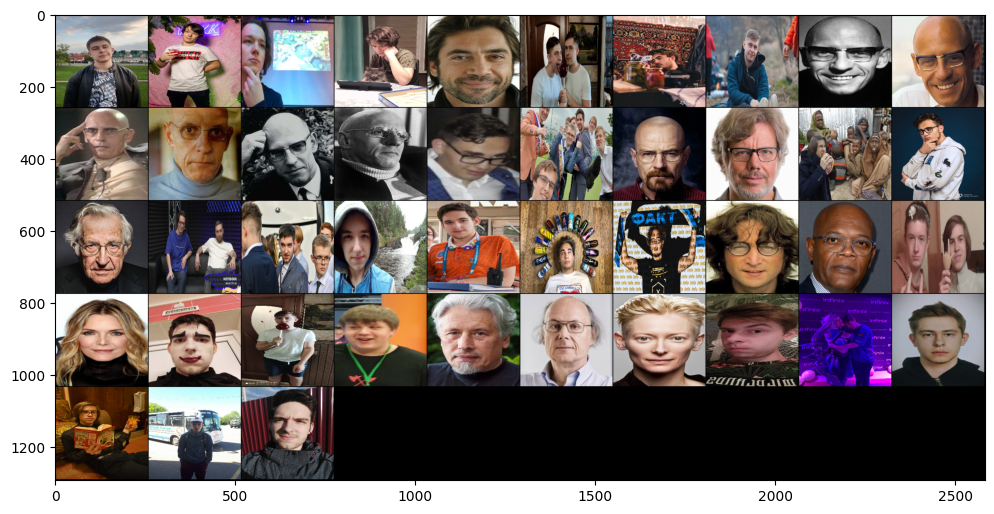

In [7]:
grid = torchvision.utils.make_grid(validation_faces, nrow=10)
plt.figure(figsize=(12, 16))
plt.imshow(grid.permute(1, 2, 0))

In [8]:
model = load_model(MODEL_NAME)

basic_transformation = albu.Compose([
    pre_transform(), post_transform()
])

augmentation_transformation = albu.Compose([
    pre_transform(), augmentation_transforms(), post_transform()
])

In [9]:
recognizer = FaceRecModel(
    model,
    basic_transformation,
    augmentation_transformation
)
recognizer.learn_owner(image_to_learn)

6.061925828456879


In [10]:
answers_pos = []
for my_face_img in my_faces:
    ans = recognizer.recognize_face(
        my_face_img.permute(1, 2, 0).numpy()
    )
    answers_pos += [int(ans)]
    
    
answers_neg = []
for my_face_img in validation_faces:
    ans = recognizer.recognize_face(
        my_face_img.permute(1, 2, 0).numpy()
    )
    answers_neg += [int(ans)]
    
answers_pos = np.array(answers_pos)
answers_neg = np.array(answers_neg)

tensor(7.3642)
tensor(2.5841)
tensor(6.2041)
tensor(3.9827)
tensor(6.2492)
tensor(8.1168)
tensor(4.3574)
tensor(7.4318)
tensor(6.3606)
tensor(7.5061)
tensor(8.4050)
tensor(5.5668)
tensor(6.8228)
tensor(8.4586)
tensor(6.6551)
tensor(5.0176)
tensor(6.7583)
tensor(7.4055)
tensor(4.6036)
tensor(6.0061)
tensor(7.2521)
tensor(7.1488)
tensor(6.2799)
tensor(6.6760)
tensor(8.0380)
tensor(5.4730)
tensor(6.1833)
tensor(5.9278)
tensor(6.9578)
tensor(6.3861)
tensor(4.4294)
tensor(6.1548)
tensor(8.1813)
tensor(7.0553)
tensor(3.9987)
tensor(6.5994)
tensor(6.8304)
tensor(6.4938)
tensor(6.5719)
tensor(6.1312)
tensor(4.7060)
tensor(7.7447)
tensor(5.0390)
tensor(7.5577)
tensor(6.8084)
tensor(6.8014)
tensor(6.4467)
tensor(6.8395)
tensor(6.4493)
tensor(7.8219)
tensor(4.6705)
tensor(5.0218)
tensor(6.6556)
tensor(4.7469)
tensor(7.4707)
tensor(6.0552)
tensor(7.9001)
tensor(6.1203)
tensor(7.3996)
tensor(5.5525)
tensor(5.7355)
tensor(7.2311)
tensor(7.3564)
tensor(8.1801)
tensor(4.9070)
tensor(4.9595)
tensor(7.3

In [11]:
print("Accuracy on POS samples:", sum(answers_pos) / len(answers_pos))
print("Accuracy on NEG samples:", 1 - sum(answers_neg) / len(answers_neg))

Accuracy on POS samples: 0.3088235294117647
Accuracy on NEG samples: 0.7674418604651163


## Изображения, где меня не признали

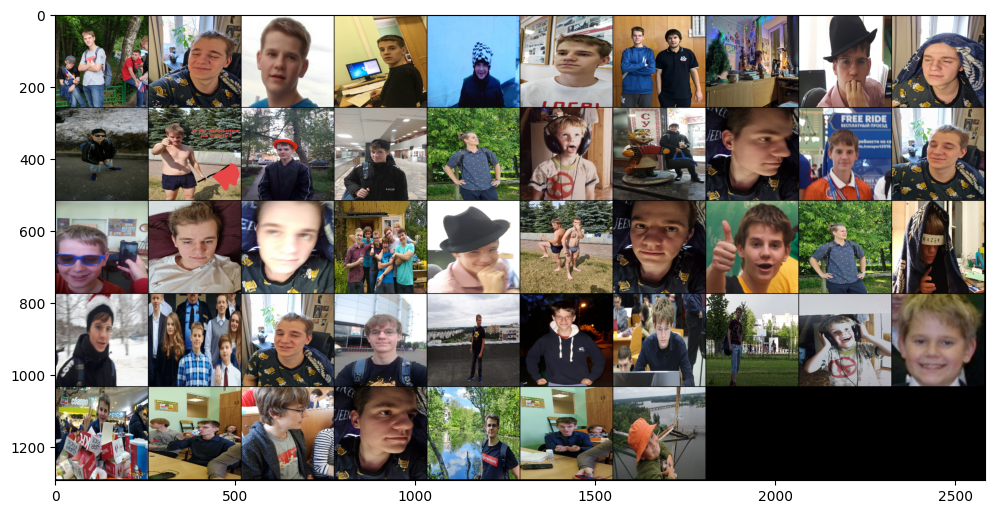

In [12]:
grid = torchvision.utils.make_grid(my_faces[answers_pos==0], nrow=10)
plt.figure(figsize=(12, 16))
plt.imshow(grid.permute(1, 2, 0))

## Изображения, где меня почему-то нашли

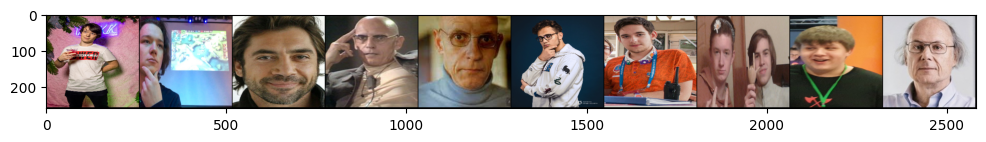

In [13]:
grid = torchvision.utils.make_grid(validation_faces[answers_neg==1], nrow=10)
plt.figure(figsize=(12, 16))
plt.imshow(grid.permute(1, 2, 0))